# intro

Diberikan data insurance.csv yang berisi :
1. Age (usia pengguna)
2. Sex (gender pengguna)
3. BMI (BMI pengguna)
4. Children (jumlah anak pengguna dalam tanggungan asuransi)
5. Smoker (kondisi merokok pengguna)
6. Region (region pengguna)
7. Charges (biaya pengguna)

total 1,338 baris.

Dari data tersebut, akan digunakan untuk menkorelasi antar variabel (kolom) yang satu dengan lainnya, sehingga bisa diketahui variabel apa yang menyebabkan tagihan pengguna menjadi lebih besar dari lainnya.

In [17]:
#import library dan file csv

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Melakukan pengecekan dataset, apakah dataset tersebut ada yang kosong sebelum melakukan analisa

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Tidak ada dataset yang kosong dan bisa dilanjutkan

In [53]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 1. Analisa Descriptive Statistic
Sesuai dengan ketentuan kelas Probabilty, akan memilih 5 pertanyaan untuk melakukan eksplorasi awal pada data tagihan kesehatan

1.1 Berapa rata rata umur pada data tersebut?

In [31]:
print('Rata-rata umur pada data tersebut sebesar', round(df['age'].mean(),0), 'year')

Rata-rata umur pada data tersebut sebesar 39.0 year


1.2 Berapa rata rata nilai BMI dari yang merokok?

In [30]:
print('Rata-rata nilai BMI yang merokok sebesar',df[(df['smoker'] == 'yes')]['bmi'].mean())

Rata-rata nilai BMI yang merokok sebesar 30.70844890510949


1.3 Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

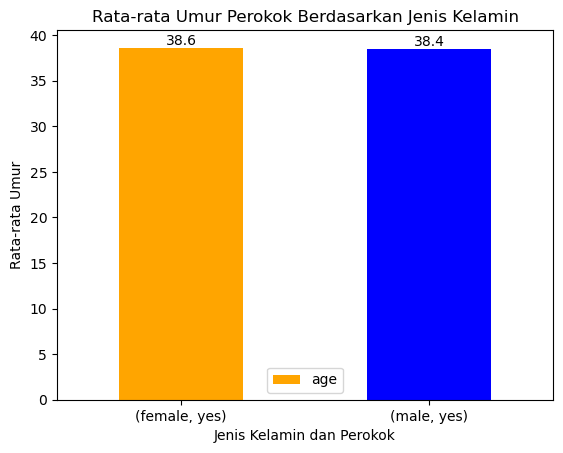

In [75]:
perokok_laki_laki = df.loc[(df['smoker'] == 'yes')&(df['sex'] =='male')]
perokok_perempuan = df.loc[(df['smoker'] == 'yes')&(df['sex'] =='female')]
rata_rata_umur_perokok = df[df['smoker'] == 'yes'].groupby(['sex', 'smoker'])[['age']].mean()

# Membuat bar plot
bar = rata_rata_umur_perokok.plot(kind="bar", y="age", title="Rata-rata Umur Perokok Berdasarkan Jenis Kelamin", color=['orange', 'blue'])

# Menambahkan label pada tiap bar
for container in bar.containers:
    plt.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10)

# Menambahkan label sumbu x dan y
plt.xlabel('Jenis Kelamin dan Perokok')
plt.ylabel('Rata-rata Umur')
plt.xticks(rotation=0)  # Memutar label sumbu x jika diperlukan

# Menampilkan plot
plt.show()

1.4 Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

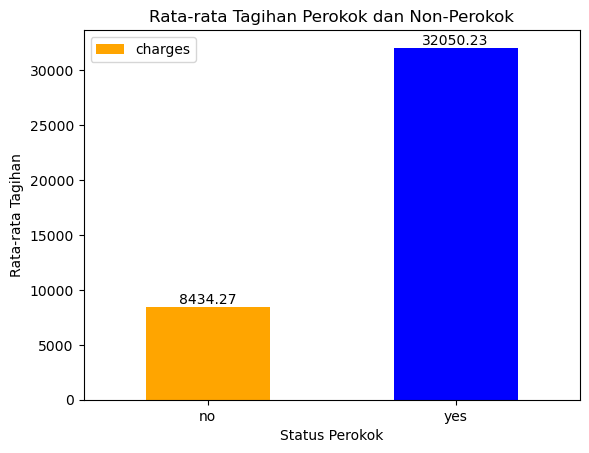

In [82]:
tagihan_perokok = df.loc[df['smoker'] == 'yes', 'charges']
tagihan_non_perokok = df.loc[df['smoker'] == 'no', 'charges']
rata_rata_tagihan = df.groupby(['smoker'])[['charges']].mean()

# Membuat bar plot
bar = rata_rata_tagihan.plot(kind="bar", y="charges", title="Rata-rata Tagihan Perokok dan Non-Perokok", color=['orange', 'blue'])

# Menambahkan label pada tiap bar
for container in bar.containers:
    plt.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Status Perokok')
plt.ylabel('Rata-rata Tagihan')
plt.xticks(rotation=0)  # Memutar label sumbu x jika diperlukan

# Menampilkan plot
plt.show()


1.5 Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25 (overweight)

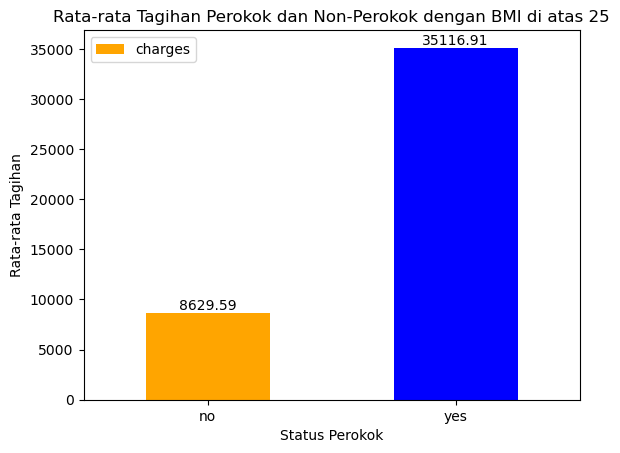

In [91]:
perokok_dengan_bmi_diatas_25 = df.loc[(df['smoker'] == 'yes') & (df['bmi'] > 25), 'charges']
non_perokok_dengan_bmi_diatas_25 = df.loc[(df['smoker'] == 'no') & (df['bmi'] > 25), 'charges']
rata_rata_tagihan_bmi_diatas_25 = df[df['bmi'] > 25].groupby(['smoker'])[['charges']].mean()

# Membuat bar plot
bar = rata_rata_tagihan_bmi_diatas_25.plot(kind="bar", y="charges", title="Rata-rata Tagihan Perokok dan Non-Perokok dengan BMI di atas 25", color=['orange', 'blue'])

# Menambahkan label pada tiap bar
for container in bar.containers:
    plt.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Status Perokok')
plt.ylabel('Rata-rata Tagihan')
plt.xticks(rotation=0)  # Memutar label sumbu x jika diperlukan

# Menampilkan plot
plt.show()


# 2. Analisa Variabel Diskrit
Sesuai dengan ketentuan kelas Probabilty, akan memilih 5 pertanyaan untuk pengecekan kondisi pada data

2.1 Gender mana yang memiliki tagihan paling tinggi?

In [6]:
df.groupby('sex')[['charges']].max()

,charges
sex,
female,63770.42801
male,62592.87309


In [7]:
df.groupby('sex')[['charges']].mean()

,charges
sex,
female,12569.578844
male,13956.751178


2.2 Distribusi peluang tagihan di tiap-tiap region

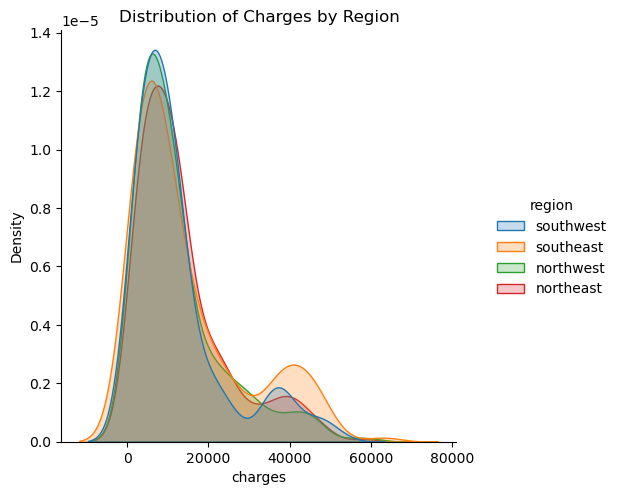

In [119]:
sns.displot(df, x="charges", hue="region", kind="kde", legend=True, fill=True)
plt.title('Distribution of Charges by Region')
plt.show()

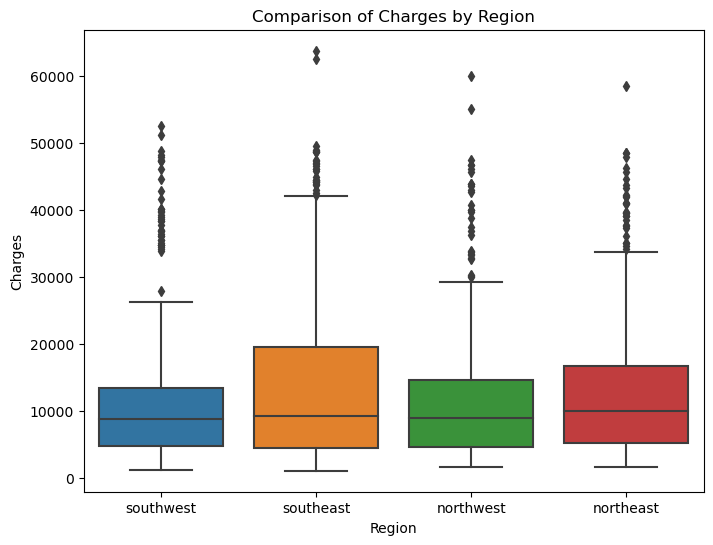

In [127]:
# Box Plot untuk membandingkan distribusi 'charges' berdasarkan 'region'
plt.figure(figsize=(8, 6))
sns.boxplot(df, x='region', y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Comparison of Charges by Region')
plt.show()


2.3 Mana yang lebih tinggi proporsi perokok atau non perokok?

In [129]:
proporsi_perokok = (df['smoker'] == 'yes').mean()
proporsi_non_perokok = (df['smoker'] == 'no').mean()

if proporsi_perokok > proporsi_non_perokok:
    print("Proporsi perokok lebih tinggi.")
elif proporsi_perokok < proporsi_non_perokok:
    print("Proporsi non-perokok lebih tinggi.")
else:
    print("Proporsi perokok dan non-perokok sama.")


Proporsi non-perokok lebih tinggi.


2.4 Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [130]:
# Jumlah perempuan yang perokok
jumlah_perempuan_perokok = ((df['sex'] == 'female') & (df['smoker'] == 'yes')).sum()

# Jumlah total perokok
jumlah_total_perokok = (df['smoker'] == 'yes').sum()

# Peluang bahwa seseorang adalah perempuan jika dia adalah perokok
peluang_perempuan_jika_perokok = jumlah_perempuan_perokok / jumlah_total_perokok

print("Peluang seseorang adalah perempuan jika dia adalah perokok:", peluang_perempuan_jika_perokok)

Peluang seseorang adalah perempuan jika dia adalah perokok: 0.4197080291970803


2.5 Berapa peluang seseorang tersebut adalah laki laki diketahui dia adalah perokok?

In [131]:
# Jumlah laki laki yang perokok
jumlah_laki_laki_perokok = ((df['sex'] == 'male') & (df['smoker'] == 'yes')).sum()

# Jumlah total perokok
jumlah_total_perokok = (df['smoker'] == 'yes').sum()

# Peluang bahwa seseorang adalah laki laki jika dia adalah perokok
peluang_laki_laki_jika_perokok = jumlah_laki_laki_perokok / jumlah_total_perokok

print("Peluang seseorang adalah laki laki jika dia adalah perokok:", peluang_laki_laki_jika_perokok)

Peluang seseorang adalah laki laki jika dia adalah perokok: 0.5802919708029197


# 3. Analisa Variabel Kontinu
Sesuai dengan ketentuan kelas Probabilty, akan menggunakan 2 pertanyaan untuk pengecekan kondisi pada data tagihan kesehatan.

3.1 Mana yang lebih mungkin terjadi (A) seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k , atau (B) seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k 

In [142]:
# Jumlah individu dengan BMI di atas 25 dan tagihan di atas 16.7k
jumlah_A = ((df['bmi'] > 25) & (df['charges'] > 16700)).sum()

# Jumlah total individu dalam sampel
jumlah_total = len(df)

# Peluang peristiwa A
peluang_A = jumlah_A / jumlah_total

# Jumlah individu dengan BMI di bawah 25 dan tagihan di atas 16.7k
jumlah_B = ((df['bmi'] < 25) & (df['charges'] > 16700)).sum()

# Peluang peristiwa B
peluang_B = jumlah_B / jumlah_total

print('Peluang A sebesar', peluang_A)
print('Peluang B sebesar', peluang_B)

if peluang_A > peluang_B:
    print("Peristiwa A lebih mungkin terjadi.")
elif peluang_A < peluang_B:
    print("Peristiwa B lebih mungkin terjadi.")
else:
    print("Peristiwa A dan B memiliki peluang yang sama.")

Peluang A sebesar 0.21150971599402094
Peluang B sebesar 0.03811659192825112
Peristiwa A lebih mungkin terjadi.


3.2 Mana yang lebih mungkin terjadi (A) Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k atau (B) Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [144]:
# Jumlah individu yang perokok, memiliki BMI di atas 25, dan tagihan di atas 16.7k
jumlah_A = ((df['smoker'] == 'yes') & (df['bmi'] > 25) & (df['charges'] > 16700)).sum()

# Jumlah total individu dalam sampel
jumlah_total = len(df)

# Peluang peristiwa A
peluang_A = jumlah_A / jumlah_total

# Jumlah individu yang non-perokok, memiliki BMI di atas 25, dan tagihan di atas 16.7k
jumlah_B = ((df['smoker'] == 'no') & (df['bmi'] > 25) & (df['charges'] > 16700)).sum()

# Peluang peristiwa B
peluang_B = jumlah_B / jumlah_total

print('Peluang A sebesar', peluang_A)
print('Peluang B sebesar', peluang_B)

if peluang_A > peluang_B:
    print("Peristiwa A lebih mungkin terjadi.")
elif peluang_A < peluang_B:
    print("Peristiwa B lebih mungkin terjadi.")
else:
    print("Peristiwa A dan B memiliki peluang yang sama.")



Peluang A sebesar 0.16068759342301944
Peluang B sebesar 0.05082212257100149
Peristiwa A lebih mungkin terjadi.


# 4. Analisa Korelasi Variabel
Sesuai dengan ketentuan kelas Probabilty, akan memilih mengecek korelasi tagihan kesehatan minimal dengan 2 variabel lainnya, misalnya dengan bmi dan variable tanggungan anak.

4.1 Korelase BMI dengan jumlah biaya yang memiliki tanggungan anak

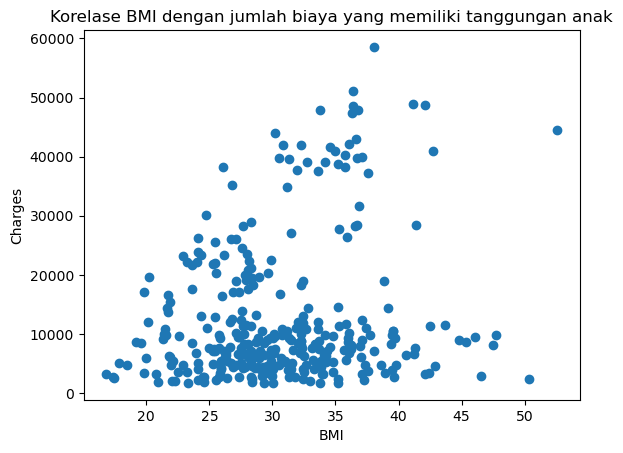

In [172]:
# Filter data untuk kondisi 'children' yang sama dengan 'yes'
filtered_df = df[df['children'] == 1]

# Membuat scatter plot antara 'bmi' dan 'charges' dengan kondisi 'children' yang sama dengan 'yes'
plt.scatter(filtered_df['bmi'], filtered_df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Korelase BMI dengan jumlah biaya yang memiliki tanggungan anak')
plt.show()

# 5. Pengujian Hipotesis
Sesuai dengan ketentuan kelas Probabilty, akan mengecek 3 hipotesis tentang karakter populasi dari data

5.1 Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

In [12]:
# Pisahkan data menjadi dua kelompok: perokok dan non-perokok
charges_perokok = df[df['smoker'] == 'yes']['charges']
charges_non_perokok = df[df['smoker'] == 'no']['charges']

# Lakukan uji t-statistik untuk membandingkan rata-rata tagihan kesehatan
t_stat, p_value = stats.ttest_ind(charges_perokok, charges_non_perokok , alternative='greater')

# Level signifikansi (alpha) yang dipilih
alpha = 0.05

# Uji hipotesis
print('P-value sebesar', p_value)
print('T-value sebesar', t_stat)
print('Alpha', alpha)
if p_value < alpha:
    print("Hipotesis nol ditolak. Tagihan kesehatan perokok lebih tinggi daripada non-perokok.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol. Tagihan kesehatan perokok tidak lebih tinggi dari non-perokok.")


P-value sebesar 4.135717921089551e-283
T-value sebesar 46.66492117272371
Alpha 0.05
Hipotesis nol ditolak. Tagihan kesehatan perokok lebih tinggi daripada non-perokok.


5.2 Tagihan kesehatan perokok laki-laki lebih besar dari perokok perempuan

In [16]:
# Pisahkan data menjadi dua kelompok: laki-laki dan perempuan
charges_laki_laki = df[(df['sex'] == 'male') & (df['smoker'] == 'yes')]['charges']
charges_perempuan = df[(df['sex'] == 'female') & (df['smoker'] == 'yes')]['charges']

# Lakukan uji t-statistik
t_stat, p_value = stats.ttest_ind(charges_laki_laki,charges_perempuan,alternative='greater')

# Tingkat signifikansi (alpha)
alpha = 0.05

# Uji hipotesis
print('P-value sebesar', p_value)
print('T-value sebesar', t_stat)
print('Alpha', alpha)

if p_value < alpha:
    print("Hipotesis nol ditolak. Tagihan kesehatan perokok laki-laki lebih besar daripada perempuan.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol. Tagihan kesehatan perokok laki-laki tidak lebih besar daripada perempuan.")


P-value sebesar 0.047239765154955586
T-value sebesar 1.6780825715285819
Alpha 0.05
Hipotesis nol ditolak. Tagihan kesehatan perokok laki-laki lebih besar daripada perempuan.


5.3 Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

In [9]:
# Pisahkan data menjadi dua kelompok: BMI di atas 25 dan BMI di bawah 25
charges_diatas_25 = df[df['bmi'] > 25]['charges']
charges_dibawah_25 = df[df['bmi'] < 25]['charges']

# Lakukan uji t-statistik
t_stat, p_value = stats.ttest_ind(charges_diatas_25, charges_dibawah_25, alternative='greater')

# Tingkat signifikansi (alpha)
alpha = 0.05

# Uji hipotesis
print('P-value sebesar', p_value)
print('T-value sebesar', t_stat)
print('Alpha', alpha)
if p_value < alpha:
    print("Hipotesis nol ditolak. Tagihan kesehatan dengan BMI di atas 25 lebih tinggi daripada BMI di bawah 25.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")


P-value sebesar 8.958227797305148e-06
T-value sebesar 4.305033989510502
Alpha 0.05
Hipotesis nol ditolak. Tagihan kesehatan dengan BMI di atas 25 lebih tinggi daripada BMI di bawah 25.
